# Iris Dataset with Clustering K-Means
Like many machine-learning algorithms, decision trees can be used for both classification and regression problems. When we implement the trees for regression, each time a new branch is created, the predicted value for the dependent variable will be the average of the observations that fall within it. Thus, the criterion to separate will be the one that minimizes the error between the real values and the predicted value.

### Load dataset


In [56]:
# General libraries and drive mounting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

Scikit-learn modules for classification trees and metrics to evaluate our model:

In [57]:
# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquicofrom sklearn import preprocessing # No se usó en este
from sklearn import preprocessing

# Módulos utiles para evaluar el modelo 
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.metrics import plot_confusion_matrix

In [58]:
from sklearn.datasets import load_iris
data = load_iris()
species = [data['target_names'][x] for x in data['target']]
df = pd.DataFrame(np.column_stack([data['data']]), columns=data['feature_names'])

## Exploratory Data Analysis

In [59]:
print('Dimension of the dataset: {}'.format(df.shape))
# Preview of the data
df.head(100)

Dimension of the dataset: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).}



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
from funpymodeling.exploratory import status

status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sepal length (cm),0,0.0,0,0.0,35,float64
1,sepal width (cm),0,0.0,0,0.0,23,float64
2,petal length (cm),0,0.0,0,0.0,43,float64
3,petal width (cm),0,0.0,0,0.0,22,float64


Analyze how many of each species we have to predict

## Construction of the model: Clustering K-Means


In this notebook we are going to explore two clustering methods seen in the lecture. The clustering methods that we will see correspond to the ML branch of unsupervised learning where the main idea is to find groups in the data that are similar to other data in the same group and the least similar possible to data in others.

The method is the **K-Means** partition algorithm with the idea of segmenting the observations of the famous iris dataset

#### [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

The "K-Means" clustering method seeks to find * k * clusters in such a way that the intra-cluster variance measured, usually as the square of the Euclidean distance, is minimized. For this the algorithm:
1) Start by finding * k centroids * and assign each sample the label corresponding to the closest centroid.

2) Once the labels of all the samples have been updated, calculate the position of the k centroids (as the average of the features of the samples in each cluster).

3) Relabels each sample according to the distance to the closest centroid.

4) Perform steps 2 and 3 until there are no more label changes.

In [60]:
# Construction of the features matrix
X = df.to_numpy()

In [61]:
# Normalize features
scaler_X = preprocessing.StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

In [62]:
# try other numbers for k
# create k-mean model with k = 5
random_state = 7
kmeans = KMeans(n_clusters=3, random_state=random_state)

# fit the model with the data reduced in principal components
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=7)

To access the labels assigned by the model to each sample we use 'kmeans.labels_'

In [52]:
# We look at the labels assigned to the first 10 samples and the counts that each one received 

np.unique(kmeans.labels_[:10], return_counts=True) 

(array([0]), array([10], dtype=int64))

Ideally we wanted to have a single tag in the first 10 samples since they correspond to the photos taken of a given person. However we got 6 different labels.

Let's see what is happening. We are going to plot the dataset in the space of the first two main components but we are also going to assign a color to each sample that corresponds to the label assigned by the model. We are also going to graph the centroid of each cluster with an "X".

To access the position of the centroids in the space of 100 PCs we use 'kmeans.cluster_centers_'

In [53]:
# save the position of the centroids
centroids = kmeans.cluster_centers_

# Print the dimension of the positions
print("Shape de los centroids:",centroids.shape)
print(centroids)

Shape de los centroids: (3, 4)
[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.01139555 -0.87600831  0.37707573  0.31115341]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]


No handles with labels found to put in legend.


Text(0, 0.5, 'sepal width (cm)')

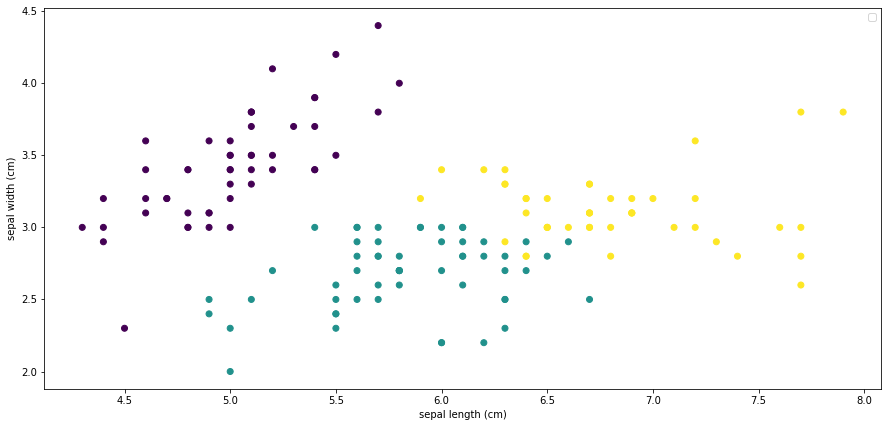

In [54]:
# This block is similar to the previous one but adding color to each sample in the scatter plot according to the assigned label

fig, ax = plt.subplots(figsize = (15, 7))

# We make a scatter plot of each of the data
ax.scatter(df['sepal length (cm)'].to_numpy(), df['sepal width (cm)'].to_numpy(), c=kmeans.labels_)
ax.legend()
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

We see that several of the clusters (ex: 11) do correspond to the photos of a person. In addition, in almost all of them it is possible to understand why the method is grouping the photos (ex: 9, teeth are seen in the smile)

## Choice of the number of clusters * k *

There is no consensus on how to choose the *k* parameter for the KMeans method. In some cases we have an idea of how many groups our data should be divided into and we simply choose that number. But in many other cases we do not have this information at the time of clustering.

In this part we are going to see two approaches for choosing k:
1. Elbow method
2. Silhouette coefficient

#### 1. [Elbow Mthod](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.)

A graph of the objective function is made based on the choice of k and the k corresponding to the point where adding one more cluster does not significantly lower the value we want to minimize is chosen. This can be detected by eye or by using some python package like ['kneed'](https://raghavan.usc.edu//papers/kneedle-simplex11.pdf)

In [37]:
from kneed import KneeLocator # import the pack so we can apply the elbow method

In [38]:
sse = [] #here we are going to save the score of the objective function

for k in range(1, 40):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(X_scaled)
  sse.append(kkmeans.inertia_)

1
2


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Text(0, 0.5, 'SSE')

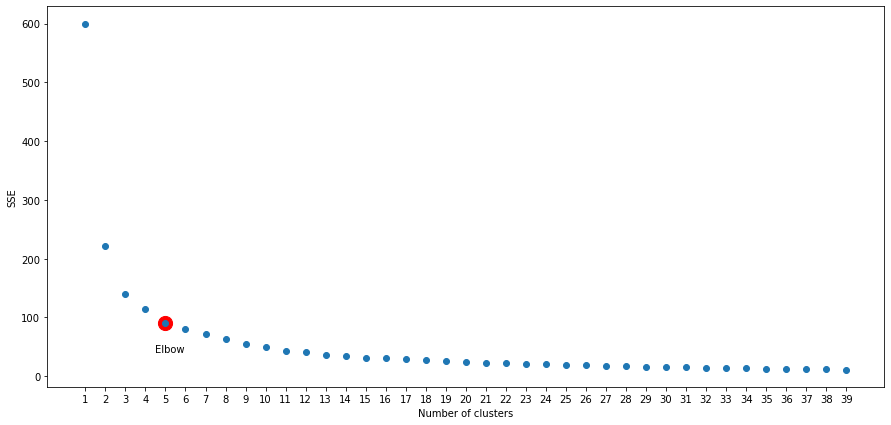

In [40]:
fig, ax = plt.subplots(figsize = (15, 7))

# I add these two lines to show the KneeLocator choice for the elbow in this graphic
ax.scatter(5, sse[4], color='red', s=200) # we add a red point to the plot of size s = 200 in the place where the elbow is located
ax.text(4.5, sse[4]-50, s="Elbow")       # we add a text below to indicate what the point represents

# these lines are the graph of SSEvsK
ax.scatter(range(1, 40), sse)            
ax.set_xticks(range(1, 40))
ax.set_xlabel("Number of clusters")
ax.set_ylabel("SSE")

In [41]:
kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing")

print("The elbow is in k =", kl.elbow)

The elbow is in k = 5


No handles with labels found to put in legend.


Text(0, 0.5, 'sepal width (cm)')

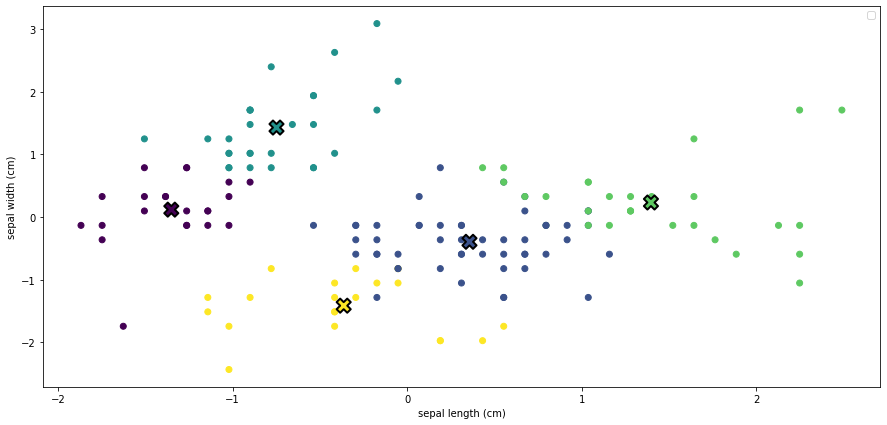

In [42]:
# Creation of the KMeans model with k = 8
kmeans5 = KMeans(n_clusters=5)

# Fit the model to data reduced in principal components
kmeans5.fit(X_scaled)

# We save the position of the centroids
centroids5 = kmeans5.cluster_centers_

# Plot
fig, ax = plt.subplots(figsize = (15, 7))

# We make a scatter plot of each of the data
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans5.labels_)
ax.scatter(centroids5[:, 0], centroids5[:, 1], marker="X", s=200, linewidths=2,
            c=np.unique(kmeans5.labels_),edgecolors='black')
ax.legend()
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

#### 2. [Silhouette coefficient](https://en.wikipedia.org/wiki/Silhouette_(clustering))

The Silhouette coefficient measures how close a sample is to the other samples in its cluster and how far it is from the samples in the closest cluster. This coefficient takes values of [-1,1], -1 would be if the clusters are overlapping and 1 that they do not touch.

The Silhouette coefficient of each sample can be obtained with the class 'silhouette_samples' of sklearn.metrics

The Silhouette score is the average of the Silhouette coefficients of all samples and is computed with the 'silhouette_score' class from sklearn.metrics. You have to pass the data and its labels to the function.

In [43]:
# we import the silhouette score
from sklearn.metrics import silhouette_score

In [44]:
# We create a list to save of the silhouette coefficients for each value of k
silhouette_coefficients = []

# It is necessary to have at least 2 clusters and at most N-1 (with N the number of samples) to obtain Silohuette coefficients
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(X_scaled)
     score = silhouette_score(X_scaled, kkkmeans.labels_)
     silhouette_coefficients.append(score)

We plot the Silhouette score as a function of k

Text(0, 0.5, 'Average Silhouette coefficients')

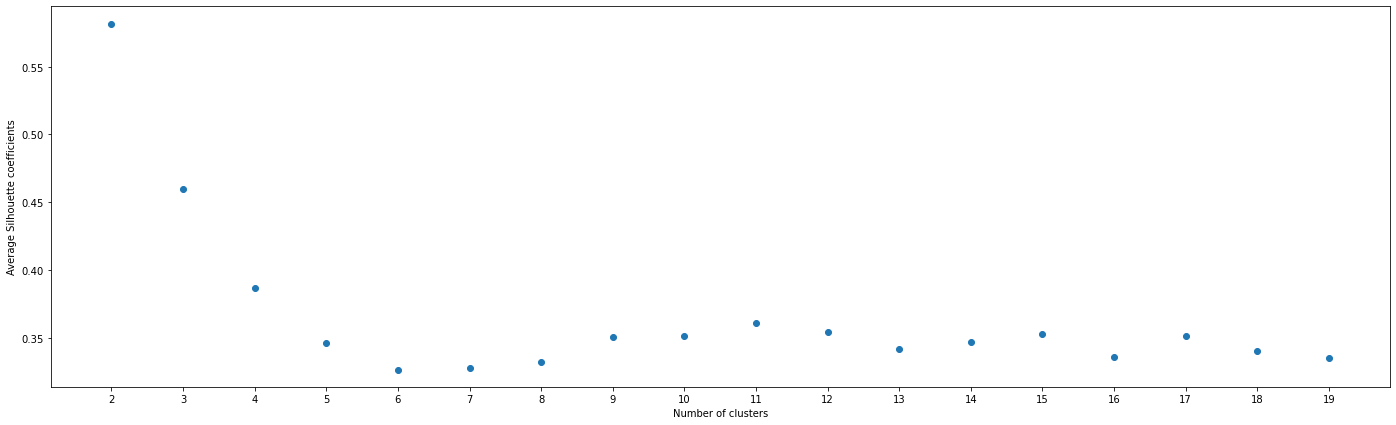

In [45]:
fig, ax = plt.subplots(figsize = (24, 7))

# these lines are the graph of SSEvsK
ax.scatter(range(2, 20), silhouette_coefficients)            
ax.set_xticks(range(2, 20))
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Average Silhouette coefficients")